In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sh-data/sh-data.csv


Missing values per column:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Logistic Regression (Regularized):
Accuracy: 0.929824561403

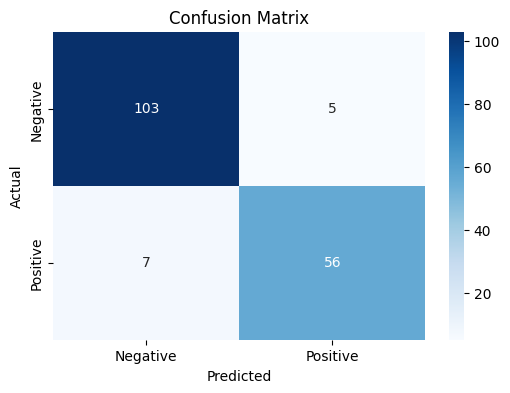

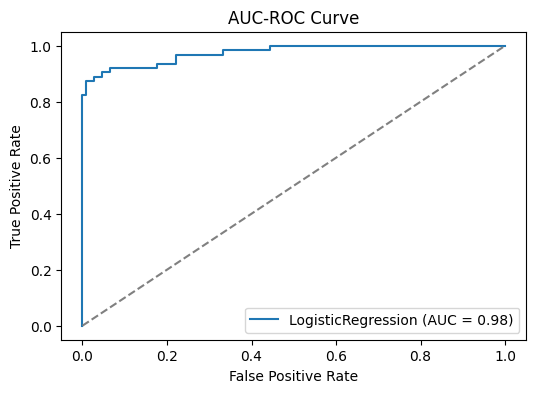

Cross-validation Accuracy Scores: [0.96491228 0.97368421 0.88596491 0.92982456 0.91150442]
Mean Accuracy: 0.9332

Decision Tree (Pruned):
Accuracy: 0.9122807017543859
AUC-ROC Score: 0.8979276895943563
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       108
           1       0.91      0.84      0.88        63

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 103                   5
Actual Positive                  10                  53


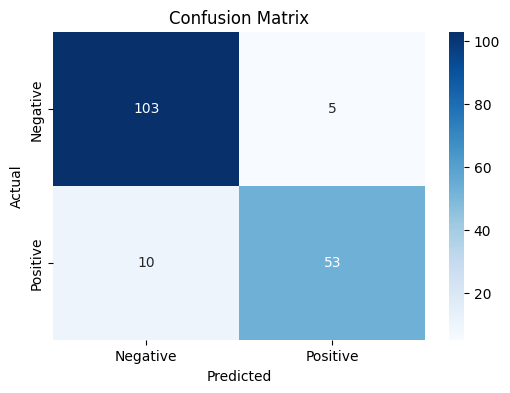

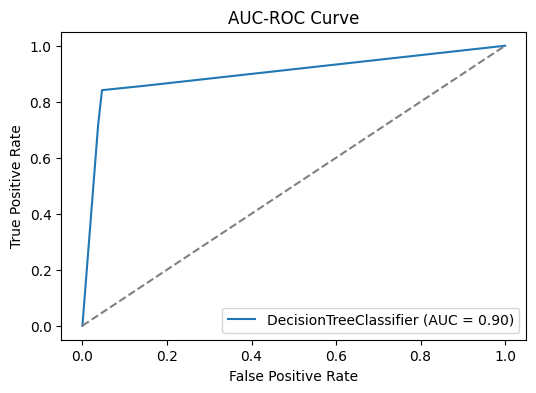

Cross-validation Accuracy Scores: [0.94736842 0.96491228 0.92982456 0.92982456 0.92920354]
Mean Accuracy: 0.9402

Random Forest (Best Model):
Accuracy: 0.9415204678362573
AUC-ROC Score: 0.9735449735449737
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       108
           1       0.95      0.89      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 105                   3
Actual Positive                   7                  56


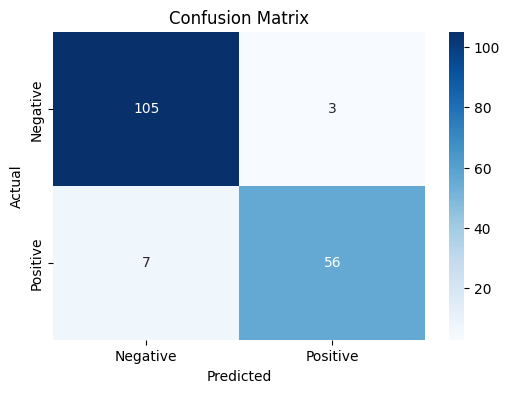

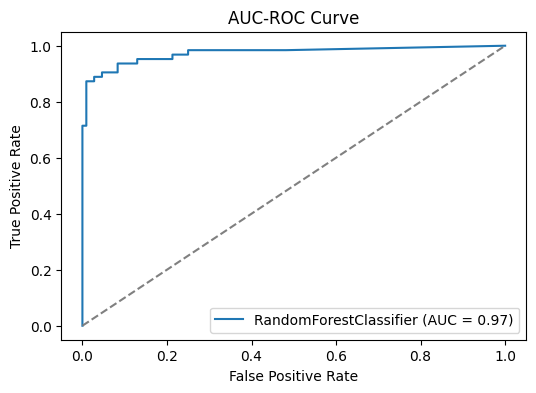

Cross-validation Accuracy Scores: [0.95614035 0.96491228 0.92105263 0.94736842 0.92035398]
Mean Accuracy: 0.9420

XGBoost (Best Model):
Accuracy: 0.9298245614035088
AUC-ROC Score: 0.9664902998236331
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       108
           1       0.93      0.87      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 104                   4
Actual Positive                   8                  55


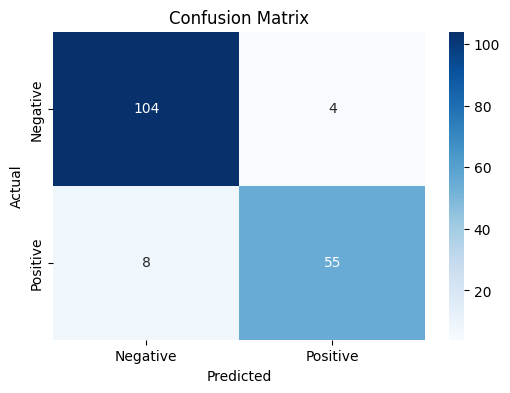

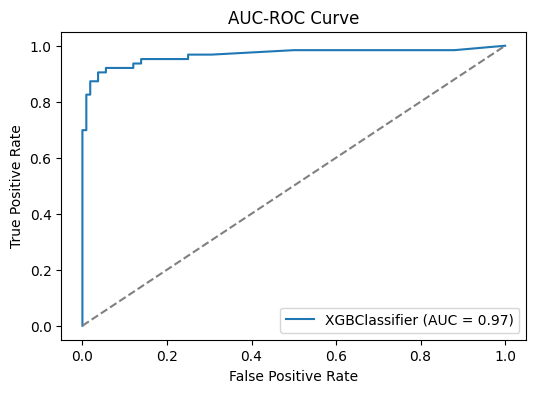

Cross-validation Accuracy Scores: [0.94736842 0.95614035 0.94736842 0.95614035 0.9380531 ]
Mean Accuracy: 0.9490

XGBoost (Early Stopping):
Accuracy: 0.935672514619883
AUC-ROC Score: 0.9670047031158141
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       108
           1       0.95      0.87      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 105                   3
Actual Positive                   8                  55


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


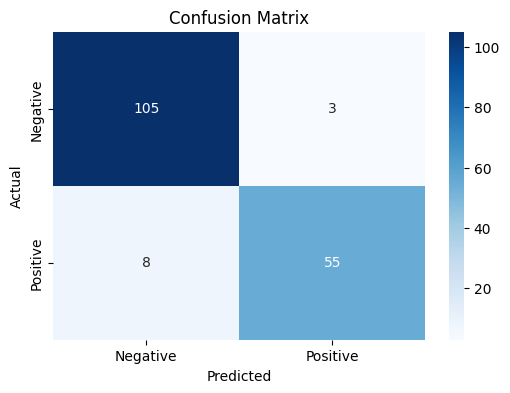

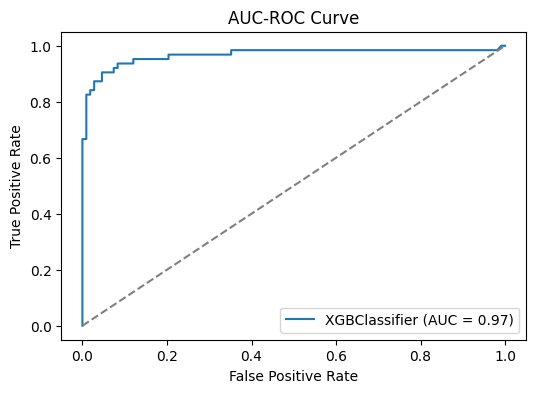

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Load Data
data = pd.read_csv("/kaggle/input/sh-data/sh-data.csv")
data.drop(columns=["id", "Unnamed: 32"], errors='ignore', inplace=True)
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})

# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Feature Selection using RandomForestClassifier
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
selected_features = feature_importance.nlargest(10).index.tolist()
X = X[selected_features]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training and Evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("AUC-ROC Score:", roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Display confusion matrix as a table
    cm_df = pd.DataFrame(cm, columns=["Predicted Negative", "Predicted Positive"],
                          index=["Actual Negative", "Actual Positive"])
    print("Confusion Matrix:")
    print(cm_df)
    
    # Confusion matrix heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # AUC-ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (AUC = {roc_auc_score(y_test, y_proba):.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("AUC-ROC Curve")
        plt.legend()
        plt.show()

# Cross-validation function
def cross_validate_model(model, X, y):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    print(f"Cross-validation Accuracy Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.4f}")

# Logistic Regression with Regularization
print("\nLogistic Regression (Regularized):")
lr = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', random_state=42)
evaluate_model(lr, X_train, X_test, y_train, y_test)
cross_validate_model(lr, X, y)

# Decision Tree with Pruning
print("\nDecision Tree (Pruned):")
dt = DecisionTreeClassifier(
    max_depth=5,  # Limit the depth of the tree
    min_samples_split=10,  # Minimum number of samples required to split a node
    ccp_alpha=0.01,  # Cost-complexity pruning parameter
    random_state=42
)
evaluate_model(dt, X_train, X_test, y_train, y_test)
cross_validate_model(dt, X, y)

# Random Forest with Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("\nRandom Forest (Best Model):")
evaluate_model(best_rf, X_train, X_test, y_train, y_test)
cross_validate_model(best_rf, X, y)

# XGBoost with Hyperparameter Tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
xgb_grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                                xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)
best_xgb = xgb_grid_search.best_estimator_
print("\nXGBoost (Best Model):")
evaluate_model(best_xgb, X_train, X_test, y_train, y_test)
cross_validate_model(best_xgb, X, y)

# XGBoost with Early Stopping
print("\nXGBoost (Early Stopping):")
xgb_early_stopping = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5
)
xgb_early_stopping.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
evaluate_model(xgb_early_stopping, X_train, X_test, y_train, y_test)